In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('House Price.xlsx')

In [3]:
df.head()

,Land,Total,Acreage,Height,FirstArea,Exterior,Fuel,Rooms,Bedrooms,FullBath,HalfBath,Fireplce,Garage
0,51067.0,131836.0,0.929,1Story,1152,Good,Electric,7,3,1,1,2,Garage
1,69807.0,145758.0,1.700,BiLevel,1025,Good,Electric,7,3,1,1,1,Garage
2,77731.0,190021.0,1.900,BiLevel,1545,Good,Electric,5,2,2,1,3,Garage
3,56753.0,128589.0,1.000,2Stories,1861,Average,NatGas,9,5,2,0,1,Garage
4,59020.0,127922.0,1.040,2Storatk,1240,Average,Oil,7,4,2,0,1,NoGarage


In [4]:
df.shape

(60, 13)

In [5]:
sum(df.duplicated())

0

no duplicate data

In [6]:
df.isna().sum()

Land         2
Total        2
Acreage      0
Height       0
FirstArea    0
Exterior     0
Fuel         0
Rooms        0
Bedrooms     0
FullBath     0
HalfBath     0
Fireplce     0
Garage       0
dtype: int64

**Land and Total have missing values**

In [7]:
### fillna with mean
round(df['Total'].mean(), 1), df['Land'].mean()

(187414.7, 66381.5)

In [8]:
df['Land'].fillna(value=df['Land'].mean(), inplace=True)
df['Total'].fillna(value=round(df['Total'].mean(), 1), inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Land       60 non-null     float64
 1   Total      60 non-null     float64
 2   Acreage    60 non-null     float64
 3   Height     60 non-null     object 
 4   FirstArea  60 non-null     int64  
 5   Exterior   60 non-null     object 
 6   Fuel       60 non-null     object 
 7   Rooms      60 non-null     int64  
 8   Bedrooms   60 non-null     int64  
 9   FullBath   60 non-null     int64  
 10  HalfBath   60 non-null     int64  
 11  Fireplce   60 non-null     int64  
 12  Garage     60 non-null     object 
dtypes: float64(3), int64(6), object(4)
memory usage: 6.2+ KB


In [10]:
df.describe()

,Land,Total,Acreage,FirstArea,Rooms,Bedrooms,FullBath,HalfBath,Fireplce
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,66381.500000,187414.656667,1.596717,1706.700000,8.466667,4.016667,2.316667,0.716667,2.166667
std,22811.691987,79852.057102,1.348479,575.801057,2.127039,1.255384,1.308274,0.640224,1.404191
min,37036.000000,78482.000000,0.342000,672.000000,5.000000,2.000000,1.000000,0.000000,0.000000
25%,49360.500000,128422.250000,0.780250,1243.750000,7.000000,3.000000,1.750000,0.000000,1.000000
50%,59492.000000,158215.000000,1.044000,1642.000000,8.000000,4.000000,2.000000,1.000000,2.000000
75%,77799.500000,235273.250000,1.722500,2014.750000,10.000000,5.000000,3.000000,1.000000,3.000000
max,126639.000000,381984.000000,5.880000,3270.000000,14.000000,8.000000,7.000000,2.000000,7.000000


**variables are on different data ranges, needs scaling**

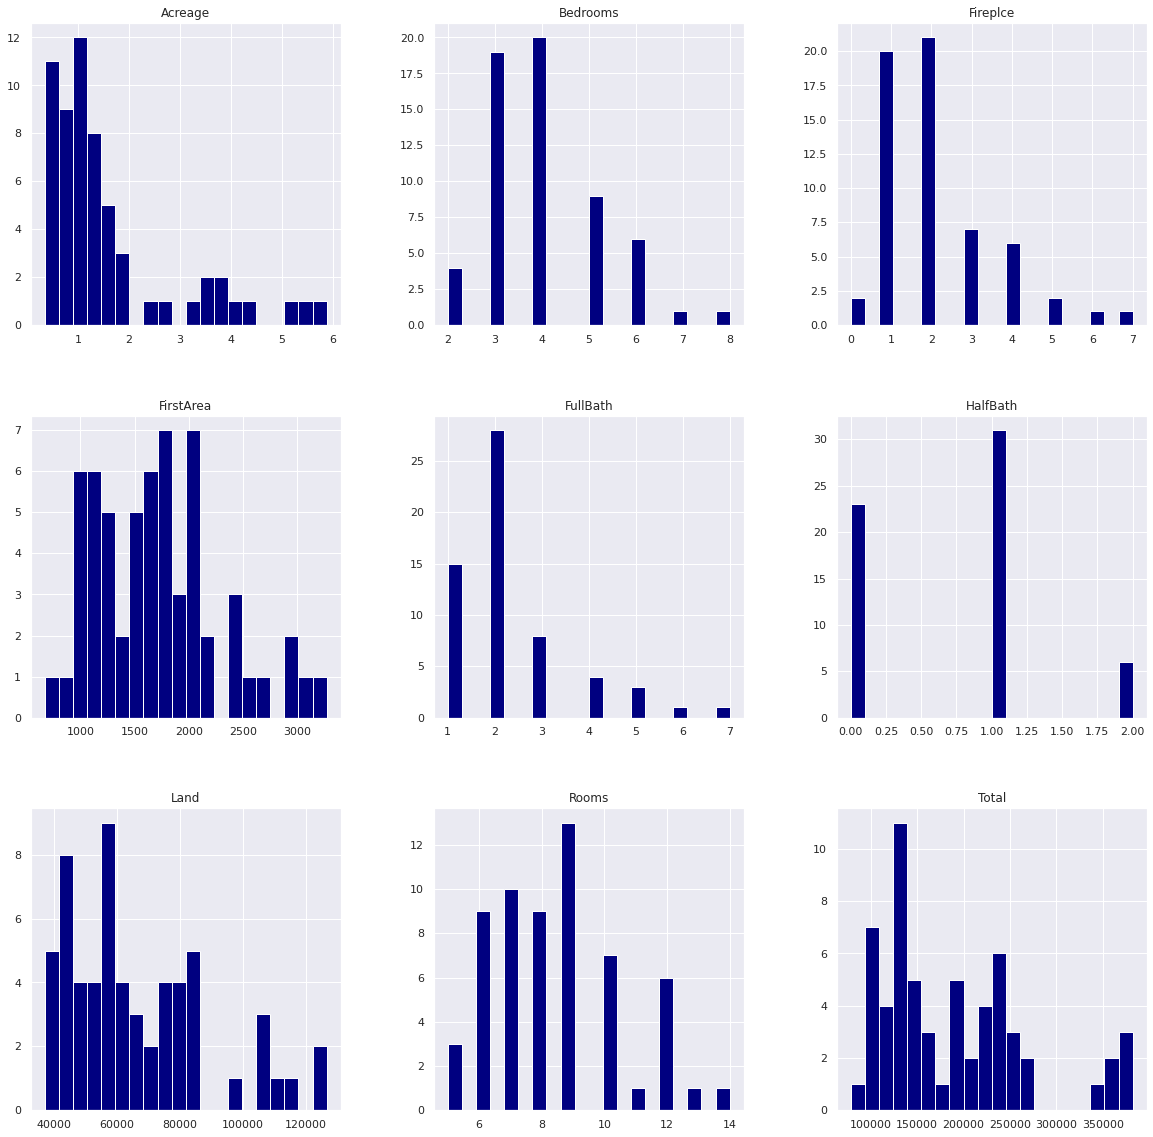

In [11]:
df.hist(bins=20,figsize=(20,20),color='navy');

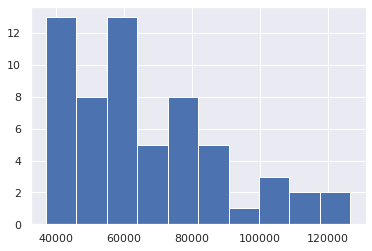

In [12]:
df.Land.hist()

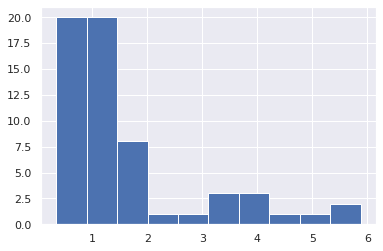

In [13]:
df.Acreage.hist()

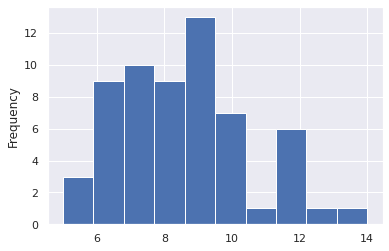

In [14]:
df.Rooms.plot.hist()

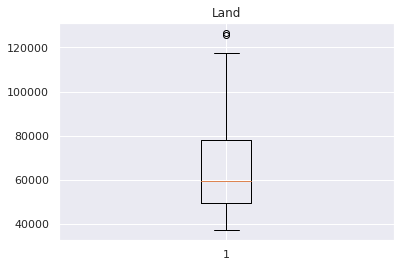

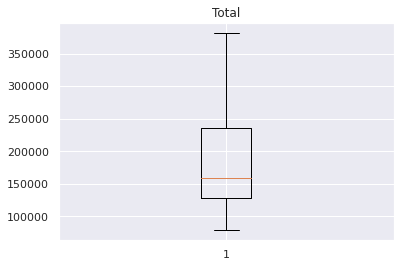

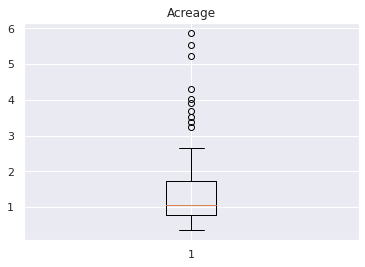

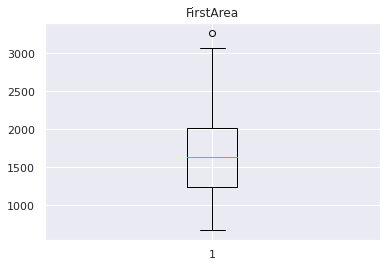

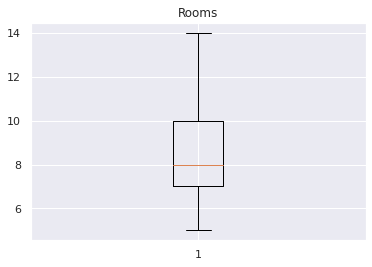

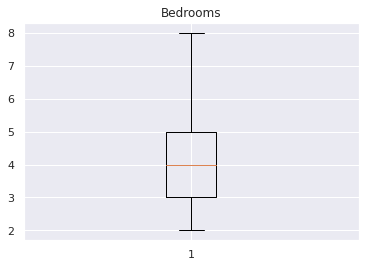

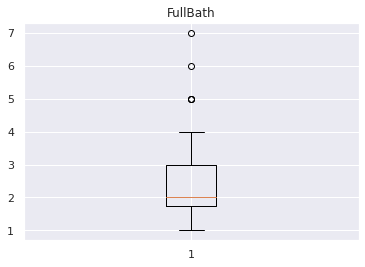

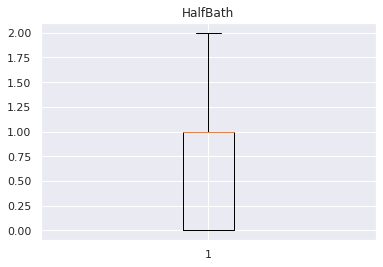

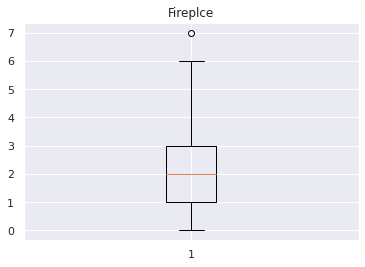

In [15]:
num_df = df.select_dtypes(include='number')
for col in num_df.columns:
    #num_df[col].plot(kind='box')
    plt.subplots()
    plt.boxplot(num_df[col])
    plt.title(col)
    plt.show

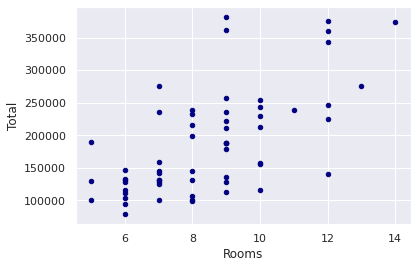

In [16]:
df.plot(x="Rooms", y="Total", kind="scatter", color='navy');

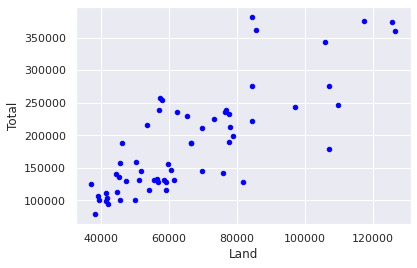

In [17]:
df.plot(x="Land", y="Total", kind="scatter", color='blue');

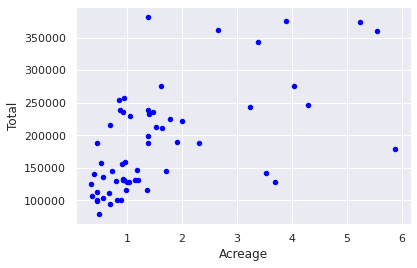

In [18]:
df.plot(x="Acreage", y="Total", kind="scatter", color='blue');

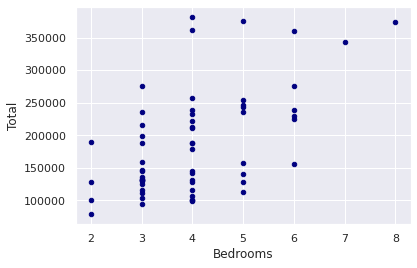

In [19]:
df.plot(x="Bedrooms", y="Total", kind="scatter", color='navy');

In [20]:
corr_matrix = df.corr()

corr_matrix["Total"].sort_values(ascending=False)

Total        1.000000
Land         0.796366
FirstArea    0.688476
Rooms        0.644420
FullBath     0.598674
Acreage      0.587415
Fireplce     0.567105
Bedrooms     0.558208
HalfBath     0.476424
Name: Total, dtype: float64

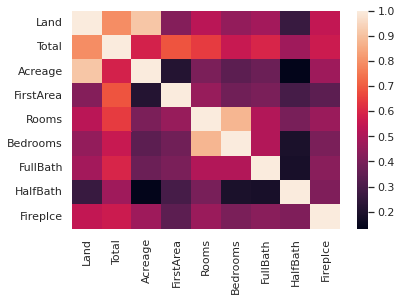

In [21]:
sns.heatmap(corr_matrix);

In [22]:
num_df= df.select_dtypes(include='number')
num_df.head()

,Land,Total,Acreage,FirstArea,Rooms,Bedrooms,FullBath,HalfBath,Fireplce
0,51067.0,131836.0,0.929,1152,7,3,1,1,2
1,69807.0,145758.0,1.700,1025,7,3,1,1,1
2,77731.0,190021.0,1.900,1545,5,2,2,1,3
3,56753.0,128589.0,1.000,1861,9,5,2,0,1
4,59020.0,127922.0,1.040,1240,7,4,2,0,1


In [23]:
cat_df = df.select_dtypes(include='object')
cat_df.head()

,Height,Exterior,Fuel,Garage
0,1Story,Good,Electric,Garage
1,BiLevel,Good,Electric,Garage
2,BiLevel,Good,Electric,Garage
3,2Stories,Average,NatGas,Garage
4,2Storatk,Average,Oil,NoGarage


In [24]:
df['Height'].value_counts()

2Storatk                    20
1Story                      12
1.5Story                     9
2Stories                     8
1Stryatk                     5
BiLevel                      4
SplitLev                     2
Name: Height, dtype: int64

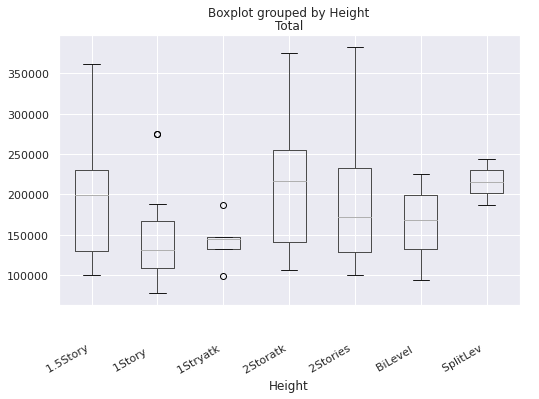

In [25]:
df.boxplot('Total', 'Height', rot=30, figsize=(8, 5));

In [26]:
df['Exterior'].value_counts()

Good                        44
Average                     15
Excellnt                     1
Name: Exterior, dtype: int64

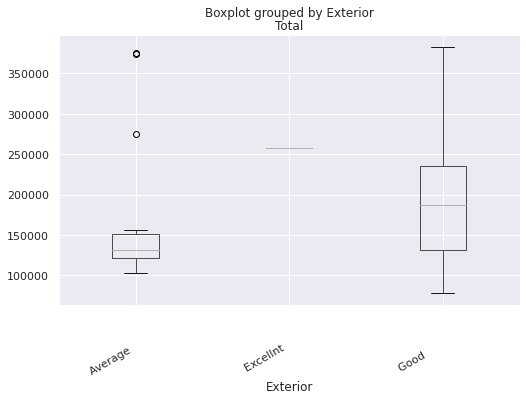

In [27]:
df.boxplot('Total', 'Exterior', rot=30, figsize=(8, 5));

In [28]:
df['Fuel'].value_counts()

NatGas                      29
Electric                    29
Oil                          1
Solar                        1
Name: Fuel, dtype: int64

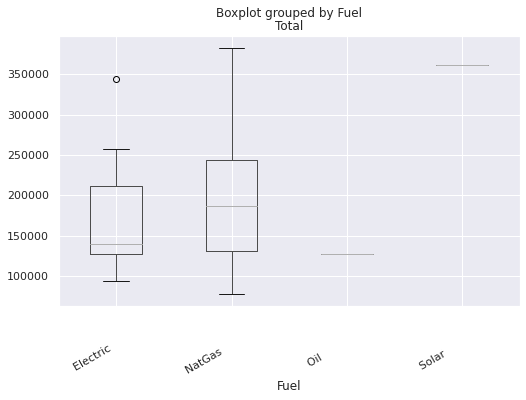

In [29]:
df.boxplot('Total', 'Fuel', rot=30, figsize=(8, 5));

In [30]:
df['Garage'].value_counts()

Garage                      53
NoGarage                     7
Name: Garage, dtype: int64

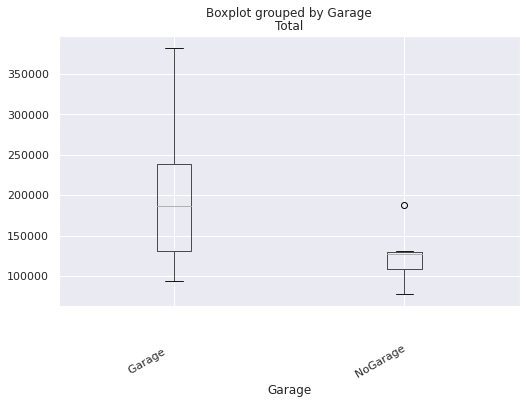

In [31]:
df.boxplot('Total', 'Garage', rot=30, figsize=(8, 5));

### One hot encode categorical values

In [32]:
# categorical column
cat_cols = cat_df.columns

# get k-1 dummies
df = pd.get_dummies(df, columns= cat_cols,  drop_first=True)

### Target and features splitting

In [33]:
X = df.drop('Total', axis=1)
y = df['Total']

In [34]:
X.head(1)

,Land,Acreage,FirstArea,Rooms,Bedrooms,FullBath,HalfBath,Fireplce,Height_1Story,Height_1Stryatk,Height_2Storatk,Height_2Stories,Height_BiLevel,Height_SplitLev,Exterior_Excellnt,Exterior_Good,Fuel_NatGas,Fuel_Oil,Fuel_Solar,Garage_NoGarage
0,51067.0,0.929,1152,7,3,1,1,2,1,0,0,0,0,0,0,1,0,0,0,0


### Data Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols_to_scale = list(num_df.columns)
cols_to_scale.remove('Total')

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

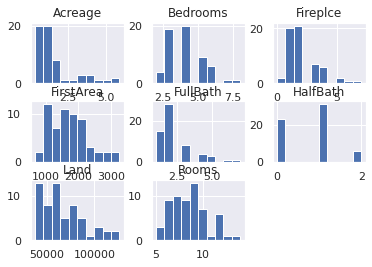

In [36]:
X[cols_to_scale].hist();

### C) Multicollinearity and variance inflation factors

In [37]:
X['RtAcge'] = np.sqrt(X['Acreage'])

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [40]:
print(vif_data)

                              feature         VIF
0                                Land  222.229114
1                             Acreage   40.005426
2                           FirstArea   32.663777
3                               Rooms  122.056887
4                            Bedrooms   73.330939
5                            FullBath    6.976393
6                            HalfBath    4.779693
7                            Fireplce    7.198088
8     Height_1Story                      3.177726
9     Height_1Stryatk                    2.082962
10    Height_2Storatk                    7.158610
11    Height_2Stories                    3.002942
12    Height_BiLevel                     1.778749
13    Height_SplitLev                    1.948334
14  Exterior_Excellnt                    1.392751
15  Exterior_Good                        4.747419
16      Fuel_NatGas                      3.022088
17      Fuel_Oil                         1.597457
18      Fuel_Solar                       1.408047


**RtAcge has very high value of VIF, indicating it is highly correlated, thus this would lead to a model with high multicollinearity**

### Train Test Split

### Training Linear regression with RtAcge variable included

In [41]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [43]:
lin_reg.score(X_train, y_train), lin_reg.score(X_test, y_test)

(0.9411771077255596, 0.40658842701029485)

In [44]:
y_pred = lin_reg.predict(X_test)
mean_absolute_error(y_pred, y_test)

28776.83977962166

### Training Linear regression without RtAcge variable included

In [45]:
## dropping RtAcge
X = X.drop('RtAcge', axis=1)

In [46]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [48]:
lin_reg.score(X_train, y_train), lin_reg.score(X_test, y_test)

(0.9339393528176356, 0.5220608899965642)

In [49]:
y_pred = lin_reg.predict(X_test)

mean_absolute_error(y_pred, y_test)

25672.823884759273

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
forest_model.fit(X_train, y_train )
predicted_random_forest = forest_model.predict(X_test)

In [51]:
forest_model.score(X_test, y_test)

0.6199154573129384

In [52]:
print("Mean Absolute Error using Random Forest:", mean_absolute_error(y_test, predicted_random_forest))

Mean Absolute Error using Random Forest: 24400.09360846561
